In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(data)

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [5]:
df['origin'].value_counts()

origin
Europe    3254
Asia      3247
USA       3203
Name: count, dtype: int64

In [6]:
df['fuel_type'].value_counts()

fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64

In [7]:
df['drivetrain'].value_counts()

drivetrain
All-wheel drive      4876
Front-wheel drive    4828
Name: count, dtype: int64

In [8]:
df = df.copy()

In [9]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [10]:
del df['num_cylinders']
del df['acceleration']
del df['fuel_type']
del df['drivetrain']
del df['origin']
del df['num_doors']


In [11]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

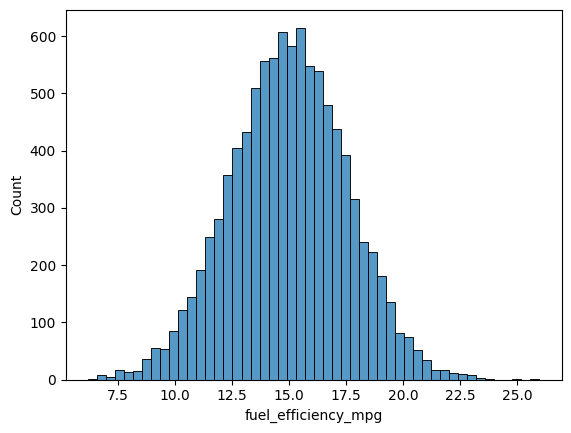

In [13]:
sns.histplot(df['fuel_efficiency_mpg'], bins=50)

In [14]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [15]:
df['horsepower'].median()

np.float64(149.0)

In [16]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

print(n, n_train, n_val, n_test)

9704 5824 1940 1940


In [17]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [19]:
df_train.shape, df_val.shape, df_test.shape

((5824, 5), (1940, 5), (1940, 5))

In [20]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [23]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [24]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

In [25]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [26]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,112.0,2772.134410,2020
1,260,138.0,3014.061530,2022
2,140,181.0,3652.186151,2016
3,270,105.0,2753.040847,2023
4,170,224.0,4163.375137,2003


In [27]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,140,148.0,2704.826005,2017
1,210,136.0,3001.227490,2004
2,210,152.0,3747.467392,2021
3,190,128.0,2705.833636,2014
4,230,156.0,2505.939657,2005


In [28]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [29]:
df_val.isnull().sum()

engine_displacement      0
horsepower             136
vehicle_weight           0
model_year               0
dtype: int64

In [30]:
df_test.isnull().sum()

engine_displacement      0
horsepower             143
vehicle_weight           0
model_year               0
dtype: int64

In [31]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [32]:
df_train_zerofill = df_train.fillna(0)
X_train_zerofill = df_train_zerofill.values

df_train_meanfill = df_train.fillna(df_train.mean())
X_train_meanfill = df_train_meanfill.values

In [33]:
w0_zerofill, w_zerofill = train_linear_regression(X_train_zerofill, y_train)
w0_meanfill, w_meanfill = train_linear_regression(X_train_meanfill, y_train)

In [34]:
print("Zero fill weights:")
print("w0:", w0_zerofill)
print("w:", w_zerofill)

print("Mean fill weights:")
print("w0:", w0_meanfill)
print("w:", w_meanfill)

Zero fill weights:
w0: 28.82736547365895
w: [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992870e-04]
Mean fill weights:
w0: 28.925259951002698
w: [ 0.00012093  0.01030308 -0.00501009 -0.00023463]


In [35]:
y_pred_zerofill = w0_zerofill + X_train_zerofill.dot(w_zerofill)
y_pred_meanfill = w0_meanfill + X_train_meanfill.dot(w_meanfill)

<Axes: ylabel='Count'>

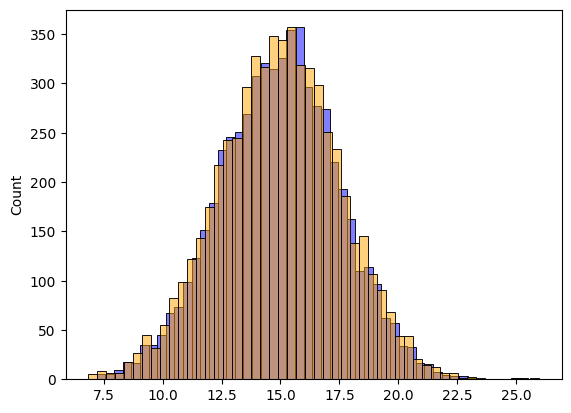

In [36]:
sns.histplot(y_pred_zerofill, bins=50,alpha=0.5, color='blue', label='Zero Fill')
sns.histplot(y_train, bins=50,alpha=0.5, color='orange', label='True Values')

<Axes: ylabel='Count'>

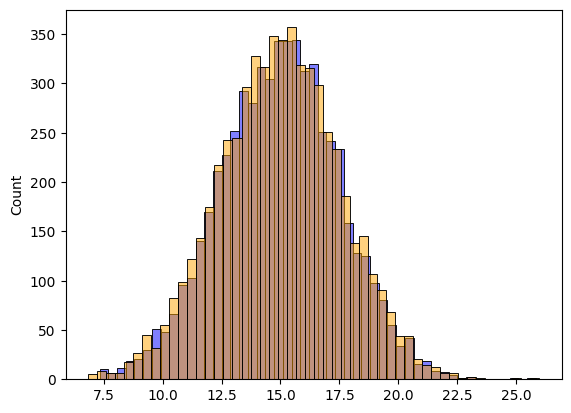

In [37]:
sns.histplot(y_pred_meanfill, bins=50,alpha=0.5, color='blue', label='Mean Fill')
sns.histplot(y_train, bins=50,alpha=0.5, color='orange', label='True Values')

In [38]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [39]:
rmse_zerofill = rmse(y_train, y_pred_zerofill).round(2)
rmse_meanfill = rmse(y_train, y_pred_meanfill).round(2)

In [40]:
print("rmse_zerofill:", rmse_zerofill)
print("rmse_meanfill:", rmse_meanfill)

rmse_zerofill: 0.52
rmse_meanfill: 0.46


In [41]:
def train_linear_regression_reg(X, y, r =0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])

    xtx_inv = np.linalg.inv(XTX)

    w_full = xtx_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [42]:
def prepare_X(df):
    df_filled = df.fillna(0)
    return df_filled.values


In [46]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    
    print(r, w0, score)

0.0 28.82736547365895 0.52
1e-05 28.82285530197122 0.52
0.0001 28.782327170764983 0.52
0.001 28.38322751768714 0.52
0.1 11.239661084581073 0.52
1 1.7315979411219746 0.52
10 0.18306246621686947 0.52


In [53]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)
    
    rmses.append(result)

0 0.5206531296294218
1 0.521338891285577
2 0.5228069974803171
3 0.515951674119676
4 0.5109129460053851
5 0.52834064601107
6 0.5313910658146311
7 0.5090670387381733
8 0.5147399129511132
9 0.5131865908224594


In [54]:
np.std(rmses)

np.float64(0.006989446426433706)

In [55]:
n= len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']



In [56]:
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0_full, w_full = train_linear_regression(X_full_train, y_full_train)

X_test = prepare_X(df_test)
y_pred = w0_full + X_test.dot(w_full)
result = rmse(y_test, y_pred)
print("Test RMSE:", result)

Test RMSE: 0.5156132022024005
